# Analysis with categorized data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Diabetes_raw_dataset.csv')

In [ ]:
dataset.columns

Index(['Patient number', ' Cholesterol (mg/dl)', 'Glucose (mg/dl)',
       'HDL Chol (mg/dl)', 'TChol/HDL ratio', 'Age', 'Gender',
       'Height /stature (cm)', 'weight1 (Kg)', 'weight2(Kg)', 'BMI (Kg/m^2)',
       'Systolic BP', 'Diastolic BP', 'waist (cm)', 'hip (cm)', 'Diabetes'],
      dtype='object')

In [ ]:
dataset[' Cholesterol (mg/dl)']

0      193.0
1      146.0
2      217.0
3      226.0
4      164.0
       ...  
495    155.0
496    179.0
497    283.0
498    228.0
499    220.0
Name:  Cholesterol (mg/dl), Length: 500, dtype: float64

## Detecting null and zero cells

In [ ]:
for column_name in dataset.columns:
    column = dataset[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Patient number  is :  0
Count of zeros in column   Cholesterol (mg/dl)  is :  0
Count of zeros in column  Glucose (mg/dl)  is :  0
Count of zeros in column  HDL Chol (mg/dl)  is :  0
Count of zeros in column  TChol/HDL ratio  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Gender  is :  0
Count of zeros in column  Height /stature (cm)  is :  2
Count of zeros in column  weight1 (Kg)  is :  2
Count of zeros in column  weight2(Kg)  is :  2
Count of zeros in column  BMI (Kg/m^2)  is :  4
Count of zeros in column  Systolic BP  is :  0
Count of zeros in column  Diastolic BP  is :  0
Count of zeros in column  waist (cm)  is :  2
Count of zeros in column  hip (cm)  is :  0
Count of zeros in column  Diabetes  is :  0


In [ ]:
for column_name in dataset.columns:
    column = dataset[column_name]
    # Get the count of null in column 
    count = (column).isnull().sum()
    print('Count of null in column ', column_name, ' is : ', count)

Count of null in column  Patient number  is :  0
Count of null in column   Cholesterol (mg/dl)  is :  1
Count of null in column  Glucose (mg/dl)  is :  1
Count of null in column  HDL Chol (mg/dl)  is :  1
Count of null in column  TChol/HDL ratio  is :  1
Count of null in column  Age  is :  0
Count of null in column  Gender  is :  5
Count of null in column  Height /stature (cm)  is :  0
Count of null in column  weight1 (Kg)  is :  0
Count of null in column  weight2(Kg)  is :  0
Count of null in column  BMI (Kg/m^2)  is :  0
Count of null in column  Systolic BP  is :  2
Count of null in column  Diastolic BP  is :  2
Count of null in column  waist (cm)  is :  0
Count of null in column  hip (cm)  is :  0
Count of null in column  Diabetes  is :  7


## gender label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] =  le.fit_transform(dataset['Gender'])

# splitting dataset

In [ ]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
#coulmn number of x
len(x[0])

14

In [ ]:
dataset.describe()

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm)
count,500.000000,499.000000,499.000000,499.000000,499.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,498.000000,498.000000,500.00000,500.000000
mean,250.500000,208.248497,128.074148,50.336673,4.467936,46.488000,0.444000,166.934600,82.46394,80.028000,29.694020,139.672691,82.672691,95.82800,109.113200
std,144.481833,50.676848,414.073059,17.141593,1.652604,17.629278,0.517106,14.551164,46.39359,18.888111,18.010717,56.976674,13.599003,15.86429,14.299882
min,1.000000,2.000000,48.000000,1.000000,1.500000,19.000000,0.000000,0.000000,0.00000,0.000000,0.000000,90.000000,48.000000,0.00000,76.200000
25%,125.750000,178.000000,81.000000,39.000000,3.200000,31.000000,0.000000,160.000000,68.10000,68.000000,22.980000,120.000000,74.000000,83.80000,99.100000
50%,250.500000,204.000000,89.000000,46.000000,4.200000,43.000000,0.000000,167.600000,79.00000,78.000000,28.130000,136.000000,82.000000,94.00000,106.700000
75%,375.250000,229.500000,106.500000,59.000000,5.300000,61.000000,1.000000,175.300000,90.80000,90.000000,33.830000,148.000000,90.000000,104.10000,116.800000
max,500.000000,500.000000,9091.000000,120.000000,19.300000,92.000000,2.000000,193.000000,996.98000,148.000000,377.280000,1140.000000,124.000000,142.20000,162.600000


# Detecting outlier using Z score
Outliers have been detected by methods such as 'Z Score' and 'Interquartile range (IQR)'. The ‘Z Score’ method is used for data with normal distribution, and in this task, a distance of 2 standard deviations from the mean is considered to find outlier data. It should be noted that in this section, not all trends can be considered outliers. For example, in the column related to ‘cholesterol’, only 2 is an outlier and other data are medically meaningful. So outlier data were selected with the opinion of the medical team.

z = (X — μ) / σ

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

index = 0
for column_name in dataset.columns:
  print("---------------------"+column_name)
  outliers=[]
  def detect_outliers(data):
      
      threshold=2
      mean = np.mean(data)
      std =np.std(data)
      
      
      for i in data:
          z_score= (i - mean)/std 
          if np.abs(z_score) > threshold:
              outliers.append(i)
      return outliers

  outlier_pt =detect_outliers(dataset[column_name])
  print(f"outliers : {outlier_pt} ")

  index += 1
  if index == 15:
      break 

---------------------Patient number
outliers : [] 
--------------------- Cholesterol (mg/dl)
outliers : [337.0, 347.0, 322.0, 443.0, 404.0, 318.0, 342.0, 78.0, 78.0, 500.0, 450.0, 479.0, 413.0, 337.0, 2.0] 
---------------------Glucose (mg/dl)
outliers : [1975.0, 9091.0] 
---------------------HDL Chol (mg/dl)
outliers : [117.0, 92.0, 85.0, 94.0, 91.0, 92.0, 92.0, 86.0, 88.0, 87.0, 87.0, 90.0, 14.0, 90.0, 108.0, 120.0, 92.0, 12.0, 110.0, 100.0, 87.0, 118.0, 114.0, 12.0, 110.0, 100.0, 1.0, 94.0, 91.0, 85.0] 
---------------------TChol/HDL ratio
outliers : [8.3, 9.4, 7.9, 7.9, 8.9, 19.3, 10.6, 12.2, 8.7, 8.0, 7.8, 8.9, 7.8] 
---------------------Age
outliers : [82, 82, 83, 84, 89, 91, 92] 
---------------------Gender
outliers : [2, 2, 2, 2, 2] 
---------------------Height /stature (cm)
outliers : [132.1, 0.0, 0.0] 
---------------------weight1 (Kg)
outliers : [322.34, 996.98] 
---------------------weight2(Kg)
outliers : [124, 126, 118, 131, 140, 126, 119, 131, 129, 120, 123, 148, 118, 121

# Detect outliers using IQR

In [ ]:
index = 0
for column_name in dataset.columns:
  print("---------------------"+column_name)

  Q1 = dataset[column_name].quantile(0.25)
  Q3 = dataset[column_name].quantile(0.75)
  print(f'Q1, Q3 are : {Q1, Q3}')

  IQR = Q3 - Q1
  print(f'IQR is : {IQR}')

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  print(f'lower_limit, upper_limit are : {lower_limit, upper_limit}')

  d = dataset[column_name][(dataset[column_name]<lower_limit)|(dataset[column_name]>upper_limit)]
  print(d.values.tolist())

  index += 1
  if index == 15:
      break    

---------------------Patient number
Q1, Q3 are : (125.75, 375.25)
IQR is : 249.5
lower_limit, upper_limit are : (-248.5, 749.5)
[]
--------------------- Cholesterol (mg/dl)
Q1, Q3 are : (178.0, 229.5)
IQR is : 51.5
lower_limit, upper_limit are : (100.75, 306.75)
[337.0, 347.0, 322.0, 307.0, 443.0, 404.0, 318.0, 342.0, 78.0, 78.0, 500.0, 450.0, 479.0, 413.0, 337.0, 2.0]
---------------------Glucose (mg/dl)
Q1, Q3 are : (81.0, 106.5)
IQR is : 25.5
lower_limit, upper_limit are : (42.75, 144.75)
[269.0, 155.0, 153.0, 197.0, 155.0, 299.0, 228.0, 187.0, 155.0, 225.0, 196.0, 233.0, 173.0, 255.0, 385.0, 182.0, 185.0, 297.0, 369.0, 193.0, 236.0, 173.0, 206.0, 176.0, 239.0, 248.0, 267.0, 270.0, 270.0, 223.0, 225.0, 330.0, 206.0, 145.0, 251.0, 177.0, 197.0, 172.0, 341.0, 174.0, 173.0, 371.0, 206.0, 203.0, 262.0, 342.0, 171.0, 235.0, 161.0, 279.0, 184.0, 173.0, 371.0, 206.0, 203.0, 262.0, 342.0, 171.0, 235.0, 269.0, 155.0, 1975.0, 9091.0]
---------------------HDL Chol (mg/dl)
Q1, Q3 are : (39.0, 5

## Imputing and Categorizing columns  

# imputing column 1 ( Cholesterol (mg/dl))

zero values : 0

null values : 1

standard range : checked by medical team

classification :

●A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal. == [0]

●A total cholesterol level of 200 to 239 mg/dL (5.17 to 6.18 mmol/L) is borderline high.== [1]

●A total cholesterol level of 240 mg/dL (6.21 mmol/L) or greater is high. == [2]


outlires : 
[2.0]

 


# outliers handling

In [ ]:
c0 = np.reshape(x[:,0], (-1, 1))
c0[c0 == 2] = np.nan

##imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
c0 = imputer.fit_transform(c0)
x[:,0] = c0[:,0]

In [ ]:
c0[:,0]

array([193.       , 146.       , 217.       , 226.       , 164.       ,
       170.       , 149.       , 164.       , 230.       , 179.       ,
       174.       , 193.       , 132.       , 203.       , 135.       ,
       187.       , 244.       , 193.       , 165.       , 172.       ,
       217.       , 223.       , 136.       , 175.       , 230.       ,
       147.       , 229.       , 179.       , 185.       , 164.       ,
       228.       , 199.       , 134.       , 169.       , 227.       ,
       149.       , 155.       , 179.       , 283.       , 228.       ,
       220.       , 170.       , 201.       , 238.       , 190.       ,
       203.       , 226.       , 204.       , 166.       , 241.       ,
       164.       , 214.       , 151.       , 184.       , 168.       ,
       146.       , 189.       , 132.       , 179.       , 135.       ,
       163.       , 204.       , 165.       , 181.       , 194.       ,
       158.       , 160.       , 181.       , 144.       , 182. 

# categorizing

In [ ]:
c0[c0 < 200 ] = 0
c0[np.logical_and(c0 < 240, c0 >=200)] = 1     # 200<x<240
c0[ c0 >= 240 ] = 2

In [ ]:
x[:,0] = c0[:,0]

In [ ]:
x[:,0]

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 2.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 2., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 2., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 2., 2., 0., 0., 0.,
       0., 2., 1., 1., 0., 0., 1., 2., 0., 2., 2., 1., 1., 0., 0., 0., 0.,
       2., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 2., 1.,
       0., 1., 1., 2., 0., 0., 1., 1., 1., 0., 0., 1., 0., 2., 0., 1., 0.,
       2., 2., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 2., 1., 1., 0., 0., 0., 1., 0., 0., 2., 0., 2., 2.,
       2., 0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 2., 2., 0., 0., 0., 1.,
       0., 0., 1., 2., 0., 2., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 2., 0., 1., 0., 2., 1., 2., 0., 0., 0., 0., 2., 1., 1., 1.,
       2., 0., 0., 1., 0.

# imputing column 2 (Glucose (mg/dl))

zero values : 0

null values : 1

standard range : checked by medical team

classification :

**Fasting Blood Sugar Test**

●Normal - 99 mg/dL or below  == [0]

●Prediabetes - 100 – 125 mg/dL == [1]

●Diabetes - 126 mg/dL or above  == [2]


outlires : 
[1975.0, 9091.0]

 


# outliers handling

In [ ]:
c1 = np.reshape(x[:,1], (-1, 1))
c1[c1 == 1975.0] = np.nan
c1[c1 == 9091.0] = np.nan

# imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
c1 = imputer.fit_transform(c1)
x[:,1] = c1[:,0]

# categorizing

In [ ]:
c1[c1 < 100 ] = 0
c1[np.logical_and(c1 < 126, c1 >= 100)] = 1
c1[ c1 >= 126 ] = 2

In [ ]:
x[:,1] = c1[:,0]

In [ ]:
x[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0.,
       0., 1., 2., 2., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 2., 0., 1., 1., 0., 0., 2., 0., 0., 1., 0., 0., 0., 2., 2., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 2., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 2., 2., 0.

# imputing column 3 (HDL Chol (mg/dl))

zero values : 0

null values : 1

standard range :

classification :


● Desirable - 60 mg/dL or above  == [0]

● Borderline - 35 – 60 mg/dL == [1]

● High risk - 35 mg/dL or below  == [2]


outlires : 
[1.0]

 


# outliers handling

In [ ]:
c2 = np.reshape(x[:,2], (-1, 1))
c2[c2 == 1.0] = np.nan

# imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
c2 = imputer.fit_transform(c2)
x[:,2] = c2[:,0]

# categorizing

In [ ]:
c2[ c2 <= 35 ] = 2        # Start with x<=30 and rank 2
c2[np.logical_and(c2 < 60, c2 > 35)] = 1
c2[c2 >= 60 ] = 0

In [ ]:
x[:,2] = c2[:,0]

In [ ]:
x[:,2]

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 2., 1., 1., 2., 1., 1., 0., 1., 1.,
       2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 2., 1., 1., 1., 2., 0., 1., 2., 0., 1., 2., 1., 1., 2., 1.,
       2., 0., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1.,
       1., 1., 2., 1., 1., 0., 1., 1., 2., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 2., 1., 1., 2., 1., 2., 1., 1., 0., 0., 1., 1., 0., 1., 0., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 2., 1., 0., 1., 0., 1., 1., 0., 2., 1., 2.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 0., 1.,
       1., 0., 2., 1., 1.

# imputing column 4 (TChol/HDL ratio)

zero values : 0

null values : 1

standard range : checked by medical team

classification :


● Desirable - 4.0 or below  == [0]

● Borderline - 4-6  == [1]

● High risk - 6.0 or above  == [2]


outlires : 


 


# outliers handling

# imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
c3 = np.reshape(x[:,3], (-1, 1))
c3 = imputer.fit_transform(c3)
x[:,3] = c3[:,0]

# categorizing

In [ ]:
c3[ c3 <= 4 ] = 0
c3[np.logical_and(c3 < 6, c3 > 4)] = 1
c3[c3 >= 6 ] = 2

In [ ]:
x[:,3] = c3[:,0]

In [ ]:
x[:,3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 2., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 1., 2., 1., 0., 0., 0., 0., 2., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0.,
       1., 2., 1., 1., 0., 0., 0., 2., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 2., 0., 1., 0., 2., 0., 1., 1., 0., 0., 2., 1., 2., 2., 1.,
       2., 0., 1., 1., 1., 0., 1., 2., 1., 1., 1., 1., 1., 1., 0., 2., 0.,
       1., 2., 2., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 2., 1., 2., 1., 0., 0., 0., 1., 0., 0., 0., 1., 2.,
       2., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 2., 2., 0., 1., 2., 1., 0., 1., 0., 2., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 2., 1., 0., 0., 0., 1., 2., 0., 0.,
       1., 0., 1., 1., 0.

# imputing column 5 (Age)

zero values : 0

null values : 0

standard range : checked by medical team

classification :


● Desirable - 20–39  == [0]

● Borderline - 40–64 == [1]

● High risk - 65 or above  == [2]


outlires : 

 


# outliers handling

# imputing

# categorizing

In [ ]:
c4 = np.reshape(x[:,4], (-1, 1))

c4[ c4 < 40 ] = 0
c4[np.logical_and(c4 < 65, c4 >= 40)] = 1
c4[c4 >= 65 ] = 2

In [ ]:
x[:,4] = c4[:,0]

In [ ]:
x[:,4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# imputing column 6 (Gender)

zero values : 0

null values : 5

standard range : checked by medical team

classification :

outlires : 

 


# outliers handling

In [ ]:
c5 = np.reshape(x[:,5], (-1, 1))
c5[c5 == 2.0] = np.nan

# imputing

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
imputer.fit(c5)
c5 = imputer.transform(c5)
x[:,5] = c5[:,0]

#female == 0
#male ==1

In [ ]:
x[:,5]

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1.

# imputing column 7 (Height /stature (cm))

zero values : 2

null values : 0

standard range : checked by medical team

classification : x

outlires : [0.0, 0.0] 

# outliers handling

In [ ]:
c6 = np.reshape(x[:,6], (-1, 1))
c6[c6 == 0] = np.nan

# imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
c6 = np.reshape(x[:,6], (-1, 1))
c6 = imputer.fit_transform(c6)
x[:,6] = c6[:,0]
x[:,6]

array([154.9       , 152.4       , 170.2       , 162.6       ,
       177.8       , 162.6       , 157.5       , 182.9       ,
       170.2       , 147.3       , 177.8       , 172.7       ,
       165.1       , 160.        , 175.3       , 160.        ,
       180.3       , 154.9       , 160.        , 162.6       ,
       180.3       , 157.5       , 167.6       , 165.1       ,
       180.3       , 154.9       , 182.9       , 165.1       ,
       193.        , 175.3       , 154.9       , 167.6       ,
       160.        , 152.4       , 180.3       , 157.5       ,
       185.4       , 152.4       , 182.9       , 182.9       ,
       177.8       , 160.        , 165.1       , 152.4       ,
       165.1       , 170.2       , 175.3       , 170.2       ,
       182.9       , 160.        , 170.2       , 172.7       ,
       175.3       , 170.2       , 160.        , 162.6       ,
       162.6       , 172.7       , 172.7       , 165.1       ,
       157.5       , 162.6       , 162.6       , 172.7 

# imputing column 8 (weight 1)

zero values : 2

null values : 0

standard range : checked by medical team

classification : x

outlires : 
[0.0, 322.34, 996.98, 0.0]

 


# outliers handling

In [ ]:
c7 = np.reshape(x[:,7], (-1, 1))
c7[c7 == 0.0] = np.nan
c7[c7 == 322.34] = np.nan
c7[c7 == 996.98] = np.nan

# imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
c7 = imputer.fit_transform(c7)
x[:,7] = c7[:,0]

In [ ]:
x[:,7]

array([ 54.93      ,  98.97      , 116.22      ,  54.03      ,
        83.08      ,  86.26      ,  86.71      ,  77.18      ,
        75.36      ,  91.71      ,  70.82      ,  88.53      ,
        77.18      ,  74.91      ,  83.08      ,  71.28      ,
        83.08      ,  72.19      ,  57.2       ,  88.98      ,
        80.81      , 104.42      , 130.75      ,  83.99      ,
        51.3       ,  53.57      , 114.41      ,  45.4       ,
        65.83      ,  85.81      ,  79.        ,  63.11      ,
        86.71      ,  79.        ,  53.57      ,  84.44      ,
        72.19      ,  93.07      ,  65.83      ,  97.16      ,
        72.64      ,  77.18      ,  87.17      ,  62.2       ,
       105.78      ,  74.91      ,  88.98      ,  81.72      ,
        99.43      ,  69.92      ,  82.17      ,  84.9       ,
        75.82      ,  99.88      , 124.4       ,  81.72      ,
        98.52      ,  85.81      ,  83.08      ,  73.09      ,
       106.69      ,  56.75      ,  57.2       ,  62.2 

# imputing column 9 (weight 2)

zero values : 2

null values : 0

standard range : checked by medical team

classification : x

outlires : 
[0.0, 0.0]

 


# outliers handling

In [ ]:
c8 = np.reshape(x[:,8], (-1, 1))
c8[c8 == 0.0] = np.nan

# imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
c8 = imputer.fit_transform(c8)
x[:,8] = c8[:,0]

In [ ]:
x[:,8]

array([ 54.        ,  61.        ,  85.        ,  52.        ,
        64.        ,  73.        ,  52.        ,  66.        ,
        72.        ,  77.        ,  85.        , 124.        ,
        77.        ,  64.        ,  70.        ,  72.        ,
        74.        , 100.        ,  52.        ,  67.        ,
       101.        ,  62.        ,  73.        , 107.        ,
       126.        ,  84.        ,  82.        ,  83.        ,
        74.        , 111.        ,  51.        ,  54.        ,
       111.        ,  70.        ,  74.        ,  79.        ,
        79.        ,  59.        , 103.        , 118.        ,
        68.        ,  54.        ,  66.        ,  77.        ,
        95.        ,  95.        , 131.        ,  84.        ,
        64.        ,  81.        ,  82.        ,  93.        ,
        59.        ,  70.        ,  91.        ,  57.        ,
        91.        , 102.        ,  77.        ,  56.        ,
        45.        ,  54.        ,  99.        ,  82.  

# imputing column 10 (BMI)

zero values : 4

null values : 0

standard range : checked by medical team

classification :


● Under Weight - 18.5 below  == [0]

● Normal - 18.5-24.9 == [1]

● Over Weight - 25-29.9  == [2]

● Obesity (Class I) - 30-34.9  == [3]

● Obesity (Class II) - 35-39.9  == [4]

● Extreme Obesity - 40 or above  == [5]


outlires : 
[83.28, 104.94, 377.28]

 


# outliers handling

In [ ]:
c9 = np.reshape(x[:,9], (-1, 1))
c9[c9 == 0.0] = np.nan
c9[c9 == 377.28] = np.nan
c9[c9 == 104.94] = np.nan
c9[c9 == 83.28] = np.nan

# imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
c9 = imputer.fit_transform(c9)
x[:,9] = c9[:,0]

# categorizing

In [ ]:
c9[c9 < 18.5 ] = 0
c9[np.logical_and(c9 < 25, c9 >= 18.5)] = 1
c9[np.logical_and(c9 < 30, c9 >= 25)] = 2
c9[np.logical_and(c9 < 35, c9 >= 30)] = 3
c9[np.logical_and(c9 < 40, c9 >= 35)] = 4
c9[ c9 >= 40 ] = 5

In [ ]:
x[:,9] = c9[:,0]

In [ ]:
x[:,9]

array([1., 5., 5., 1., 2., 3., 3., 1., 2., 5., 1., 2., 2., 2., 2., 2., 2.,
       3., 1., 3., 1., 5., 5., 3., 0., 1., 3., 0., 0., 2., 3., 1., 3., 3.,
       0., 3., 1., 5., 1., 2., 1., 3., 3., 2., 4., 2., 2., 2., 2., 2., 2.,
       2., 1., 3., 5., 3., 4., 2., 2., 2., 5., 1., 1., 1., 1., 1., 1., 3.,
       3., 2., 5., 1., 1., 1., 2., 5., 2., 3., 2., 3., 3., 1., 3., 4., 4.,
       2., 1., 2., 2., 0., 3., 2., 2., 1., 2., 3., 2., 4., 2., 2., 2., 1.,
       2., 2., 0., 1., 3., 4., 1., 2., 1., 3., 4., 1., 0., 2., 1., 2., 3.,
       1., 5., 1., 5., 4., 1., 3., 1., 2., 5., 1., 1., 3., 5., 3., 4., 1.,
       1., 2., 1., 1., 0., 5., 2., 1., 2., 2., 1., 3., 4., 2., 1., 2., 4.,
       4., 5., 1., 2., 5., 1., 1., 1., 3., 1., 1., 1., 5., 3., 3., 1., 3.,
       3., 3., 2., 2., 3., 3., 3., 2., 4., 3., 3., 5., 4., 3., 2., 0., 3.,
       2., 1., 1., 4., 3., 2., 1., 3., 3., 2., 0., 1., 1., 2., 2., 1., 0.,
       3., 4., 3., 2., 1., 0., 1., 2., 1., 1., 3., 2., 2., 1., 2., 0., 3.,
       2., 3., 2., 3., 1.

# imputing column 11 (Systolic BP)

zero values : 0

null values : 2

standard range : checked by medical team

classification :


● Systolic blood pressure below 130 mmHg  == [0]

● Systolic blood pressure above 130 mmHg == [1]


outlires : 
[730.0, 1140.0] 

 


# outliers handling

In [ ]:
c10 = np.reshape(x[:,10], (-1, 1))
c10[c10 == 730.0] = np.nan
c10[c10 == 1140.0] = np.nan

# imputing

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
c10 = imputer.fit_transform(c10)
x[:,10] = c10[:,0]

# categorizing

In [ ]:
c10[c10 <= 130 ] = 0
c10[ c10 > 130 ] = 1

In [ ]:
x[:,10] = c10[:,0]

In [ ]:
x[:,10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1.

# imputing column 12 (Diastolic BP)

zero values : 0

null values : 2

standard range : checked by medical team

classification :


● Diastolic blood pressure below 85 mmHg  == [0]

● Diastolic blood pressure above 85 mmHg == [1]


outlires : x

 


# outliers handling

# imputing

In [ ]:
from sklearn.impute import KNNImputer
c11 = np.reshape(x[:,11], (-1, 1))
imputer = KNNImputer(n_neighbors=10)
c11 = imputer.fit_transform(c11)
x[:,11] = c11[:,0]

# categorizing

In [ ]:
c11[c11 <= 85 ] = 0
c11[c11 > 85 ] = 1

In [ ]:
x[:,11] = c11[:,0]

In [ ]:
x[:,11]

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1.

# imputing column 13 (waist (cm))


zero values : 2

null values : 0

standard range : checked by medical team

classification :

● 81 cm or below == [0]

● 81 cm - 88 cm == [1]

● 88 cm - 94 cm == [2]

● 94 cm or above == [3]


outlires : [0,0]

 


# outliers handling

In [ ]:
c12 = np.reshape(x[:,12], (-1, 1))
c12[c12 == 0.0] = np.nan

# imputing

In [ ]:
from sklearn.impute import KNNImputer
import copy
imputer = KNNImputer(n_neighbors=10)
c12 = imputer.fit_transform(c12)
c12_not_categ = copy.deepcopy(c12[:,0]) # not categorized data is needed later 
c12_not_categ

array([ 81.3       ,  83.8       , 101.6       ,  78.7       ,
        81.3       ,  94.        ,  78.7       ,  73.7       ,
        78.7       ,  86.4       ,  94.        , 124.5       ,
        99.1       ,  71.1       ,  78.7       ,  99.1       ,
        86.4       , 101.6       ,  71.1       ,  88.9       ,
       116.8       ,  71.1       ,  88.9       , 111.8       ,
       127.        , 109.2       ,  86.4       , 109.2       ,
        81.3       , 111.8       ,  83.8       ,  81.3       ,
       119.4       , 101.6       ,  88.9       ,  96.5       ,
        76.2       ,  81.3       , 104.1       , 121.9       ,
        83.8       ,  71.1       ,  81.3       ,  88.9       ,
        99.1       ,  86.4       , 121.9       ,  88.9       ,
        83.8       , 101.6       ,  99.1       , 101.6       ,
        73.7       ,  88.9       , 106.7       ,  71.1       ,
        96.5       , 104.1       ,  96.5       ,  66.        ,
        76.2       ,  83.8       , 116.8       ,  96.5 

# categorizing

In [ ]:
c12[c12 < 81 ] = 0
c12[np.logical_and(c12 < 88, c12 >= 81)] = 1
c12[np.logical_and(c12 < 94, c12 >= 88)] = 2
c12[ c12 >= 94 ] = 3

In [ ]:
x[:,12] = c12[:,0]

In [ ]:
x[:,12]

array([1., 1., 3., 0., 1., 3., 0., 0., 0., 1., 3., 3., 3., 0., 0., 3., 1.,
       3., 0., 2., 3., 0., 2., 3., 3., 3., 1., 3., 1., 3., 1., 1., 3., 3.,
       2., 3., 0., 1., 3., 3., 1., 0., 1., 2., 3., 1., 3., 2., 1., 3., 3.,
       3., 0., 2., 3., 0., 3., 3., 3., 0., 0., 1., 3., 3., 1., 1., 1., 3.,
       0., 0., 1., 3., 2., 3., 3., 2., 0., 3., 0., 1., 3., 3., 3., 1., 3.,
       3., 3., 3., 3., 3., 0., 2., 1., 0., 3., 2., 3., 1., 1., 3., 0., 1.,
       2., 1., 3., 3., 3., 3., 2., 3., 1., 1., 0., 1., 3., 0., 3., 3., 1.,
       2., 1., 1., 3., 3., 1., 3., 3., 3., 3., 0., 2., 3., 3., 0., 3., 1.,
       3., 3., 1., 3., 3., 1., 0., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 1., 2., 0., 0., 1., 3., 0., 0., 3., 3.,
       3., 1., 3., 3., 3., 2., 1., 3., 3., 3., 3., 1., 0., 3., 3., 3., 2.,
       3., 3., 1., 2., 3., 2., 3., 3., 0., 3., 1., 3., 1., 1., 3., 3., 3.,
       0., 3., 3., 3., 3., 0., 2., 3., 2., 3., 2., 0., 2., 1., 1., 1., 3.,
       3., 3., 3., 3., 2.

# imputing column 14 (hip (cm))


zero values : 0

null values : 0

standard range : checked by medical team

classification : No category

outlires : x

 


In [ ]:
x[:,13]

array([ 96.5, 101.6, 114.3,  99.1,  99.1, 101.6,  94. ,  91.4,  99.1,
       116.8, 104.1, 147.3, 109.2,  99.1,  99.1, 109.2,  99.1, 132.1,
        88.9,  96.5, 127. ,  88.9, 101.6, 127. , 124.5, 119.4, 104.1,
       114.3, 101.6, 119.4,  96.5,  86.4, 147.3, 106.7,  99.1, 116.8,
        88.9, 101.6, 111.8, 124.5,  99.1,  94. ,  88.9, 104.1, 119.4,
       109.2, 129.5, 111.8,  96.5, 106.7, 109.2, 104.1,  88.9,  96.5,
       116.8,  81.3, 114.3, 132.1,  99.1,  94. ,  91.4,  96.5, 121.9,
       106.7, 101.6,  86.4, 101.6, 139.7,  96.5,  99.1, 106.7, 124.5,
       104.1, 129.5, 119.4, 106.7, 101.6, 134.6, 111.8,  96.5, 106.7,
       114.3, 142.2, 101.6, 119.4, 147.3, 111.8, 104.1, 116.8, 147.3,
        88.9,  96.5, 116.8,  99.1, 119.4, 106.7, 106.7, 116.8, 109.2,
       109.2,  88.9,  94. , 111.8,  96.5, 104.1, 114.3, 106.7, 114.3,
       101.6, 132.1,  94. ,  91.4,  96.5, 101.6, 104.1,  86.4, 124.5,
       106.7,  99.1, 109.2, 106.7, 106.7, 144.8, 129.5,  99.1, 121.9,
       119.4, 114.3,

# New Features
Following the recommendation of the medical team, 2 features of WHR (Waist/Hip) and WSR (Waist / Stature) are added to the data. Women with high WHRs in the Presence of this risk factor are notably at risk for diabetes [1]. Also, BMI and WSR have similar effects on accruing diabetes [2].

## WHR
waist-to-hip ratio

In [ ]:
## imputed not categorized  parameters 
#waist == c12_not_categ
#hip   == x[:,13]
whr = np.divide(c12_not_categ , x[:,13])
whr

array([0.84248705, 0.82480315, 0.88888889, 0.79414733, 0.82038345,
       0.92519685, 0.83723404, 0.80634573, 0.79414733, 0.73972603,
       0.90297791, 0.84521385, 0.90750916, 0.71745711, 0.79414733,
       0.90750916, 0.87184662, 0.76911431, 0.79977503, 0.92124352,
       0.91968504, 0.79977503, 0.875     , 0.88031496, 1.02008032,
       0.91457286, 0.82997118, 0.95538058, 0.80019685, 0.93634841,
       0.86839378, 0.94097222, 0.81059063, 0.95220244, 0.89707366,
       0.82619863, 0.85714286, 0.80019685, 0.93112701, 0.97911647,
       0.84561049, 0.75638298, 0.91451069, 0.85398655, 0.82998325,
       0.79120879, 0.94131274, 0.79516995, 0.86839378, 0.95220244,
       0.90750916, 0.97598463, 0.82902137, 0.92124352, 0.9135274 ,
       0.87453875, 0.84426947, 0.78803936, 0.97376387, 0.70212766,
       0.83369803, 0.86839378, 0.95816243, 0.90440487, 0.82480315,
       0.94097222, 0.82480315, 0.85468862, 0.81554404, 0.79414733,
       0.78537957, 0.93815261, 0.85398655, 0.84324324, 0.87185

In [ ]:
#categorize whr
whr[whr >= 0.91 ] = 3       #Start with x>= 0.91 with rank of 3 
whr[np.logical_and(whr < 0.91, whr >= 0.86)] = 2
whr[np.logical_and(whr < 0.86, whr >= 0.83)] = 1
whr[whr < 0.83 ] = 0
whr

array([1., 0., 2., 0., 0., 3., 1., 0., 0., 0., 2., 1., 2., 0., 0., 2., 2.,
       0., 0., 3., 3., 0., 2., 2., 3., 3., 0., 3., 0., 3., 2., 3., 0., 3.,
       2., 0., 1., 0., 3., 3., 1., 0., 3., 1., 0., 0., 3., 0., 2., 3., 2.,
       3., 0., 3., 3., 2., 1., 0., 3., 0., 1., 2., 3., 2., 0., 3., 0., 1.,
       0., 0., 0., 3., 1., 1., 2., 1., 0., 2., 0., 2., 3., 2., 3., 0., 0.,
       0., 2., 2., 3., 2., 0., 3., 0., 0., 1., 1., 3., 0., 0., 2., 2., 2.,
       0., 1., 3., 3., 3., 2., 2., 2., 2., 3., 0., 1., 2., 2., 3., 2., 2.,
       1., 0., 0., 1., 3., 1., 2., 3., 0., 0., 2., 0., 3., 0., 0., 1., 1.,
       0., 1., 3., 2., 1., 0., 0., 2., 0., 3., 3., 0., 2., 2., 3., 2., 1.,
       0., 3., 3., 2., 1., 3., 2., 2., 0., 0., 0., 0., 1., 0., 3., 3., 3.,
       3., 0., 0., 2., 3., 1., 0., 2., 2., 3., 3., 0., 0., 3., 1., 1., 0.,
       2., 0., 2., 3., 3., 1., 2., 3., 2., 2., 1., 2., 1., 2., 3., 3., 3.,
       0., 0., 0., 2., 3., 1., 2., 1., 2., 2., 1., 0., 2., 3., 1., 0., 2.,
       3., 0., 3., 3., 2.

In [ ]:
##concatenate new feature to x
y_whr = whr.reshape(len(whr),1)
x = np.concatenate((x, y_whr), axis=1)

In [ ]:
x

array([[  0. ,   0. ,   1. , ...,   1. ,  96.5,   1. ],
       [  0. ,   0. ,   1. , ...,   1. , 101.6,   0. ],
       [  1. ,   0. ,   1. , ...,   3. , 114.3,   2. ],
       ...,
       [  2. ,   0. ,   0. , ...,   3. , 111.8,   3. ],
       [  1. ,   0. ,   1. , ...,   3. , 124.5,   3. ],
       [  1. ,   0. ,   0. , ...,   1. ,  99.1,   1. ]])

## WSR
waist-to-stature ratio

In [ ]:
## imputed not categorized parameters.
#waist == c12_not_categ
#stature   == x[:,6]
whs = np.divide(c12_not_categ , x[:,6])
whs

array([0.52485474, 0.54986877, 0.59694477, 0.48400984, 0.45725534,
       0.57810578, 0.49968254, 0.40295243, 0.46239718, 0.58655804,
       0.52868391, 0.7209033 , 0.60024228, 0.444375  , 0.44894467,
       0.619375  , 0.47920133, 0.65590704, 0.444375  , 0.54674047,
       0.64780921, 0.45142857, 0.53042959, 0.67716535, 0.70438159,
       0.70497095, 0.47238928, 0.66141732, 0.42124352, 0.63776383,
       0.54099419, 0.48508353, 0.74625   , 0.66666667, 0.49306711,
       0.61269841, 0.41100324, 0.53346457, 0.56916348, 0.66648442,
       0.47131609, 0.444375  , 0.49242883, 0.58333333, 0.60024228,
       0.50763807, 0.69537935, 0.52232667, 0.45817387, 0.635     ,
       0.58225617, 0.58830342, 0.42042213, 0.52232667, 0.666875  ,
       0.43726937, 0.59348093, 0.60277939, 0.55877244, 0.39975772,
       0.48380952, 0.51537515, 0.71832718, 0.55877244, 0.47803765,
       0.51619048, 0.52375   , 0.7124105 , 0.43028978, 0.49968254,
       0.50757117, 0.66628637, 0.48605796, 0.59704757, 0.62112

In [ ]:
#categorize whs
whs[whs >= 0.60 ] = 3
whs[np.logical_and(whs < 0.6, whs >= 0.56)] = 2
whs[np.logical_and(whs < 0.56, whs >= 0.51)] = 1
whs[whs < 0.51 ] = 0
whs

array([1., 1., 2., 0., 0., 2., 0., 0., 0., 2., 1., 3., 3., 0., 0., 3., 0.,
       3., 0., 1., 3., 0., 1., 3., 3., 3., 0., 3., 0., 3., 1., 0., 3., 3.,
       0., 3., 0., 1., 2., 3., 0., 0., 0., 2., 3., 0., 3., 1., 0., 3., 2.,
       2., 0., 1., 3., 0., 2., 3., 1., 0., 0., 1., 3., 1., 0., 1., 1., 3.,
       0., 0., 0., 3., 0., 2., 3., 2., 0., 3., 0., 0., 3., 2., 3., 0., 2.,
       3., 1., 2., 3., 3., 0., 0., 1., 0., 3., 0., 2., 2., 1., 1., 0., 0.,
       0., 0., 2., 2., 2., 3., 1., 3., 0., 1., 0., 0., 1., 0., 3., 2., 2.,
       0., 1., 1., 3., 3., 0., 3., 3., 2., 3., 1., 1., 2., 3., 1., 3., 0.,
       3., 3., 0., 3., 3., 1., 0., 1., 3., 2., 1., 2., 2., 1., 2., 3., 3.,
       3., 3., 1., 3., 3., 2., 3., 0., 1., 0., 0., 0., 3., 0., 0., 2., 3.,
       2., 0., 0., 3., 2., 2., 1., 2., 3., 3., 3., 2., 0., 2., 3., 1., 2.,
       3., 3., 0., 0., 3., 2., 2., 3., 0., 2., 0., 3., 0., 0., 2., 3., 3.,
       0., 3., 2., 2., 3., 0., 1., 3., 1., 2., 1., 0., 1., 0., 0., 0., 1.,
       3., 3., 3., 3., 0.

In [ ]:
##concatenate new feature to x
y_whs = whs.reshape(len(whs),1)
x = np.concatenate((x, y_whs), axis=1)

In [ ]:
x

array([[  0. ,   0. ,   1. , ...,  96.5,   1. ,   1. ],
       [  0. ,   0. ,   1. , ..., 101.6,   0. ,   1. ],
       [  1. ,   0. ,   1. , ..., 114.3,   2. ,   2. ],
       ...,
       [  2. ,   0. ,   0. , ..., 111.8,   3. ,   2. ],
       [  1. ,   0. ,   1. , ..., 124.5,   3. ,   3. ],
       [  1. ,   0. ,   0. , ...,  99.1,   1. ,   0. ]])

# imputing coulmn DV (Diabetes)
In the last stage of data pre-processing, diabetes, or no diabetes as dependent variable changes to 0 and 1.

zero values : 0

null values : 7

standard range : checked by medical team

classification : X

outlires : X

 


# imputing

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
cdv = np.reshape(y, (-1, 1))
imputer.fit(cdv) #2D
cdv = imputer.transform(cdv)
y = cdv.flatten() #1D
y 

array(['No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'Diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes',
       'No diabetes', 'No diabetes', 'No diabetes', 'No diabetes'

## label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
y =  le_y.fit_transform(y)
y
# 1 == No diabetes
# 0 == Diabetes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

# Train,Test split and Feature Scaling

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,1.0,1.0,1.0,0.0,165.1,65.83,66.0,1.0,1.0,1.0,3.0,106.7,2.0,2.0
1,0.0,0.0,2.0,0.0,0.0,0.0,165.1,73.09,56.0,2.0,0.0,0.0,0.0,94.0,0.0,0.0
2,1.0,1.0,0.0,0.0,2.0,0.0,160.0,84.44,111.0,3.0,1.0,1.0,3.0,129.5,3.0,3.0
3,0.0,0.0,2.0,2.0,2.0,1.0,170.2,131.21,54.0,5.0,0.0,0.0,1.0,96.5,2.0,0.0
4,1.0,0.0,1.0,1.0,2.0,1.0,177.8,67.19,82.0,1.0,1.0,1.0,3.0,101.6,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1.0,0.0,1.0,0.0,1.0,0.0,157.5,66.28,76.0,2.0,1.0,1.0,3.0,119.4,3.0,3.0
371,2.0,0.0,1.0,1.0,1.0,0.0,157.5,63.56,72.0,2.0,1.0,1.0,2.0,109.2,1.0,2.0
372,2.0,1.0,2.0,2.0,0.0,1.0,167.6,71.73,81.0,2.0,1.0,1.0,3.0,106.7,2.0,2.0
373,1.0,0.0,0.0,0.0,0.0,0.0,170.2,81.72,84.0,2.0,0.0,1.0,2.0,111.8,0.0,1.0


In [ ]:
Y_train

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

## Feature Scaling

In [ ]:
X_train[:,[6,7,8,13]]

array([[165.1 ,  65.83,  66.  , 106.7 ],
       [165.1 ,  73.09,  56.  ,  94.  ],
       [160.  ,  84.44, 111.  , 129.5 ],
       ...,
       [167.6 ,  71.73,  81.  , 106.7 ],
       [170.2 ,  81.72,  84.  , 111.8 ],
       [190.5 ,  97.61,  84.  , 116.8 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[6,7,8,13]] = sc.fit_transform(X_train[:,[6,7,8,13]])
X_test[:,[6,7,8,13]] = sc.transform(X_test[:,[6,7,8,13]])

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.303998,-0.776778,-0.788704,1.0,1.0,1.0,3.0,-0.140416,2.0,2.0
1,0.0,0.0,2.0,0.0,0.0,0.0,-0.303998,-0.371302,-1.339131,2.0,0.0,0.0,0.0,-1.023927,0.0,0.0
2,1.0,1.0,0.0,0.0,2.0,0.0,-0.813766,0.262603,1.688219,3.0,1.0,1.0,3.0,1.445731,3.0,3.0
3,0.0,0.0,2.0,2.0,2.0,1.0,0.205770,2.874738,-1.449216,5.0,0.0,0.0,1.0,-0.850007,2.0,0.0
4,1.0,0.0,1.0,1.0,2.0,1.0,0.965425,-0.700821,0.091980,1.0,1.0,1.0,3.0,-0.495212,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1.0,0.0,1.0,0.0,1.0,0.0,-1.063652,-0.751645,-0.238276,2.0,1.0,1.0,3.0,0.743096,3.0,3.0
371,2.0,0.0,1.0,1.0,1.0,0.0,-1.063652,-0.903559,-0.458447,2.0,1.0,1.0,2.0,0.033504,1.0,2.0
372,2.0,1.0,2.0,2.0,0.0,1.0,-0.054111,-0.447259,0.036937,2.0,1.0,1.0,3.0,-0.140416,2.0,2.0
373,1.0,0.0,0.0,0.0,0.0,0.0,0.205770,0.110689,0.202066,2.0,0.0,1.0,2.0,0.214380,0.0,1.0


In [ ]:
X_test

array([[ 0.        ,  0.        ,  1.        , ..., -1.37872283,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.49521155,
         3.        ,  3.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.21438019,
         0.        ,  1.        ],
       ...,
       [ 1.        ,  2.        ,  2.        , ...,  1.271811  ,
         1.        ,  3.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.56221927,
         2.        ,  3.        ],
       [ 1.        ,  1.        ,  1.        , ...,  0.21438019,
         2.        ,  2.        ]])

# Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 87.2 %


In [ ]:
from sklearn.metrics import confusion_matrix
con1 = confusion_matrix(Y_test, Y_pred_lr)
print(con1)
print(f"correctly diagnose nodiabetics is {con1[0,0]}/{con1[1,0]+con1[0,0]}")
print(f"correctly diagnose diabetics is {con1[1,1]}/{con1[0,1]+con1[1,1]}")

[[13 14]
 [ 2 96]]
correctly diagnose nodiabetics is 13/15
correctly diagnose diabetics is 96/110


## SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 87.2 %


In [ ]:
from sklearn.metrics import confusion_matrix
con2 = confusion_matrix(Y_test, Y_pred_svm)
print(con2)
print(f"correctly diagnose nodiabetics is {con2[0,0]}/{con2[1,0]+con2[0,0]}")
print(f"correctly diagnose diabetics is {con2[1,1]}/{con2[0,1]+con2[1,1]}")

[[13 14]
 [ 2 96]]
correctly diagnose nodiabetics is 13/15
correctly diagnose diabetics is 96/110


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 95.2 %


In [ ]:
from sklearn.metrics import confusion_matrix
con3 = confusion_matrix(Y_test, Y_pred_dt)
print(con3)
print(f"correctly diagnose nodiabetics is {con3[0,0]}/{con3[1,0]+con3[0,0]}")
print(f"correctly diagnose diabetics is {con3[1,1]}/{con3[0,1]+con3[1,1]}")

[[23  4]
 [ 2 96]]
correctly diagnose nodiabetics is 23/25
correctly diagnose diabetics is 96/100


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 92.8 %


In [ ]:
from sklearn.metrics import confusion_matrix
con4 = confusion_matrix(Y_test, Y_pred_rf)
print(con4)
print(f"correctly diagnose nodiabetics is {con4[0,0]}/{con4[1,0]+con4[0,0]}")
print(f"correctly diagnose diabetics is {con4[1,1]}/{con4[0,1]+con4[1,1]}")

[[19  8]
 [ 1 97]]
correctly diagnose nodiabetics is 19/20
correctly diagnose diabetics is 97/105


## Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=16))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9813
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9813
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9813
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9813
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9813
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9813
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9813
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9813
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9840
Epoch 10/300
12/12 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9813
Epoch 11/

In [ ]:
Y_pred_nn = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 86.4 %


In [ ]:
from sklearn.metrics import confusion_matrix
con5 = confusion_matrix(Y_test, Y_pred_nn)
print(con5)
print(f"correctly diagnose nodiabetics is {con5[0,0]}/{con5[1,0]+con5[0,0]}")
print(f"correctly diagnose diabetics is {con5[1,1]}/{con5[0,1]+con5[1,1]}")

[[12 15]
 [ 1 97]]
correctly diagnose nodiabetics is 12/13
correctly diagnose diabetics is 97/112


# Output final score

In [ ]:
scores = [score_lr,score_svm,score_dt,score_rf,score_nn]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 87.2 %
The accuracy score achieved using Support Vector Machine is: 87.2 %
The accuracy score achieved using Decision Tree is: 95.2 %
The accuracy score achieved using Random Forest is: 92.8 %
The accuracy score achieved using Neural Network is: 87.2 %


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


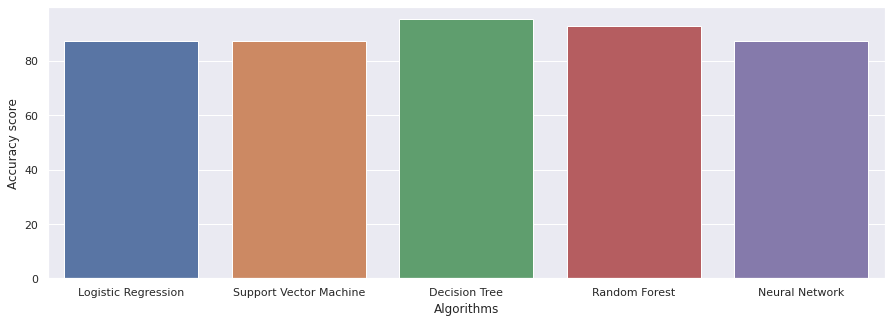

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)